# Принятие решений в бизнесе

## Описание проекта


Я работаю аналитиком в крупном интернет-магазине. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Введение

**Цели исследования**
- Приоритизировать гипотезы;
- Запустить A/B-тест;
- Проанализировать результаты.


**Ход исследования**

1. Предобработка данных


2. Приоритизация гипотез, путем применения фреймворков ICE и RICE
   1. Применить фреймворки ICE и RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
   2. Проанализировать как изменилась приоритизация гипотез при применении RICE вместо ICE


3. Запуск и анализ результатов А/B-теста
   1. Построить и проанализировать графики кумулятивной выручки по группам, кумулятивного среднего чека по группам, относительного изменения кумулятивного среднего чека группы B к группе A.
   2.  Постройть и проанализировать графики кумулятивного среднего количества заказов на посетителя по группам, относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения. 
   3. Построить и проанализровать точечный график количества заказов по пользователям. Посчитать 95-й и 99-й перцентили количества заказов на пользователя и выбрать границу для определения аномальных пользователей.
   4. Построть и проанализировать точечный график стоимостей заказов. Посчитать 95-й и 99-й перцентили стоимости заказов и выбрать границу для определения аномальных заказов.
   5.  Посчитать статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по «сырым» и «очищенным» данным. Сделать выводы и предположения.
   
   
4. Принятие решение по результатам теста.
   Варианты решений: 
   1. Остановить тест, зафиксировать победу одной из групп. 
   2. Остановить тест, зафиксировать отсутствие различий между группами. 
   3. Продолжить тест.


**Описания датасетов**

***Данные для первой части***

Файл `hypothesis.csv`

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


***Данные для второй части***

Файл `orders.csv`

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
- Файл /datasets/visitors.csv. Скачать датасет
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


### Ознакомление и предобработка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats
import datetime as dt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#### Изучаем датасет hypothesis:

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.set_option('display.max_colwidth', None)
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Приводим названия столбцов к змеиному регистру

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

Проверяем датасет на дубликаты

In [6]:
hypothesis[hypothesis.duplicated()] 

,hypothesis,reach,impact,confidence,efforts


Проверяем датасет на пропуски

In [7]:
hypothesis.isnull().sum() 

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

#### Изучаем датасет orders:

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Проверяем датасет на дубликаты

In [10]:
orders[orders.duplicated()] 

,transactionId,visitorId,date,revenue,group


Проверяем датасет на пропуски

In [11]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Приводим дату к нужному формату:

In [12]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Изучаем датасет visitors:

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверяем датасет на дубликаты

In [15]:
visitors[visitors.duplicated()]

,date,group,visitors


Проверяем датасет на пропуски

In [16]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

Приводим дату к нужному формату

In [17]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Изучим какое количество групп в А/В-тесте:


In [18]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

#### Изучим даты начала и окончания теста

In [19]:
print('Дата начала теста:', visitors['date'].min())
print('Дата окончания теста:', visitors['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


#### Изучим не попадают ли какие-то пользователи в обе группы:



In [20]:
print('Уникальных пользователей в группе А:', orders[orders['group'] == 'A']['visitorId'].nunique())
print('Уникальных пользователей в группе B:', orders[orders['group'] == 'B']['visitorId'].nunique())
print('Уникальных пользователей:', orders['visitorId'].nunique())

Уникальных пользователей в группе А: 503
Уникальных пользователей в группе B: 586
Уникальных пользователей: 1031


In [21]:
print('Пользователи в обоих группах:' ,orders.groupby('visitorId')['group'].nunique().reset_index().query('group > 1')['visitorId'].count())


Пользователи в обоих группах: 58


Часть пользователей попадает в обе группы. Удалить или оставить их - вопрос открытый, поскольку оба варианта ведут к искажению данных о покупках. В датасете visitors эти id удалить нельзя. Принимаю решение о том, что бы оставить, поскольку удаление искажает данные по конверсии.

#### Вывод

- В А/В тесте 2 группы - А и В;
- Дата начала теста: 2019-08-01. Дата окончания теста: 2019-08-31;
- Данные приведены в нужный вид и регистр, изменен формат дат;
- Часть пользователей попадает в обе группы. Принято решение о том, что бы оставить, поскольку удаление искажает данные по конверсии.

###  Приоритизация гипотез

**Описание фреймворков**
- ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач. Рассчитывается по формулам:
   - ICE SCORE = (impact * confidence) / efforts;
   - ICE SCORE = impact * confidence * ease.
   
- У этого метода есть модификация RICE (R от англ. reach, «охват»):
   - RICE SCORE = (reach * impact * confidence) / efforts.
   
Фреймворк RICE состоит из четырёх компонент:

- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
- Efforts — сколько стоит протестировать эту гипотезу.

Как и в случае WSJF, параметры фреймворков ICE и RICE оценивают в удобных шкалах: например, от 0 до 10 или в числах ряда Фибоначчи.

#### Применим фреймворк ICE для приоритизации гипотез

In [22]:
pd.set_option('display.max_colwidth', None)

hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending = False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


#### Применим фреймворк RICE для приоритизации гипотез

In [23]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending = False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Выводы

- При использовании метода ICE наиболее перспективной оказалась гипотеза 8. Затем идут гипотезы 0, 7, 6, 2
- При использовании метода RICE наиболее перспективной оказалась гипотеза 7. Затем идут гипотезы 2, 0, 6, 8

- При примении RICE вместо ICE приоритизация изменилась следующим образом: гипотеза 8 заняла последнее место из наиболее значимых. На первое место поднялась гипотеза 7, гипотеза 0 - опустилась на третье место, а гипотеза 2 - поднялась на второе место. Приоритизация значительно изменилась.
- Отличие метода RICE состоит в наличии компонента Reach, который позволяет оценить скольких пользователей затронет изменение, которое вы хотите внести

### Анализ A/B-теста

#### Построим график кумулятивной выручки по группам:

[]

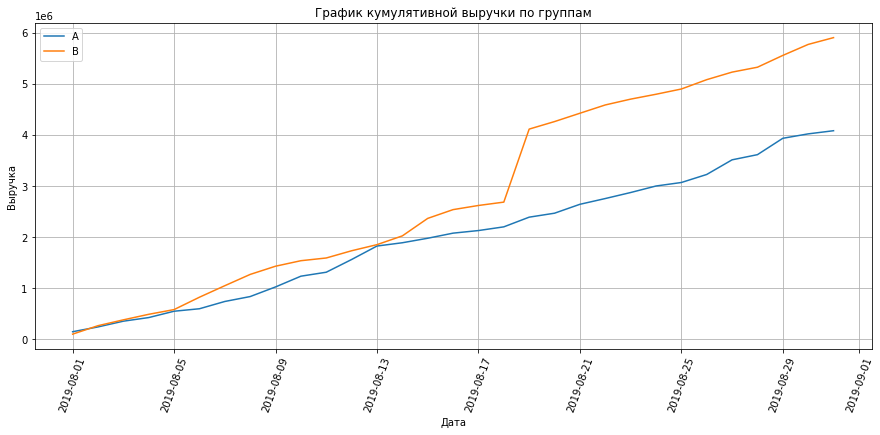

In [24]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 6))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.grid()
plt.legend();
plt.xticks(rotation=70)
plt.plot()

**Вывод**

- По графику выручка в группе B растет быстрее и резко увеличивается после 18 августа. 
- Можно предположить что в этот день пользователи или совершили несколько крупных, или большое количество заказов.

#### Построим график кумулятивного среднего чека по группам:

[]

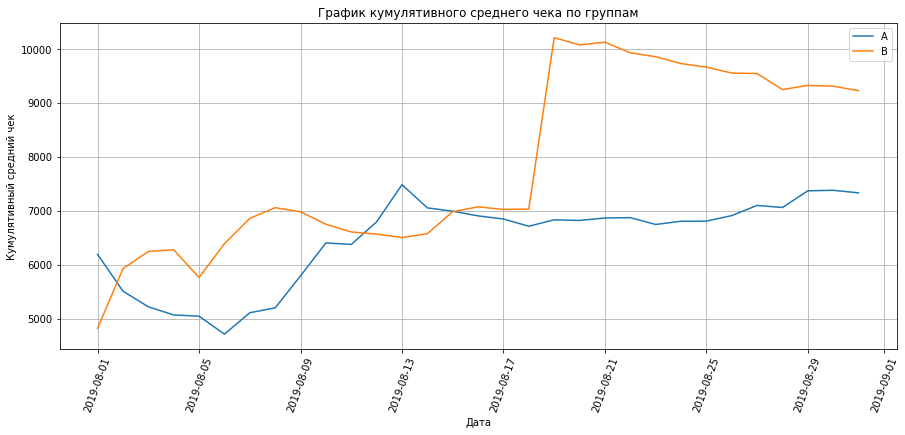

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.legend()
plt.grid()
plt.xticks(rotation=70)
plt.plot()

**Вывод**

- В первой половине графика средний чек для группы В зачастую выше, но с 12.08 по 15.08 средний чек выше для группы А. По графику кумулятивный средний чек в группе B значительно возрастает после 18 августа. 

Вероятно, что причиной роста на графиках кумулятивной выручки и кумулятивного среднего чека для группы В является крупный заказ. Проверим это предположение:

In [26]:
orders.query('date =="2019-08-19" and group =="B"').sort_values('revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B


Это действительно так. Revenue этого заказа составил 1294500 у.е.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

[]

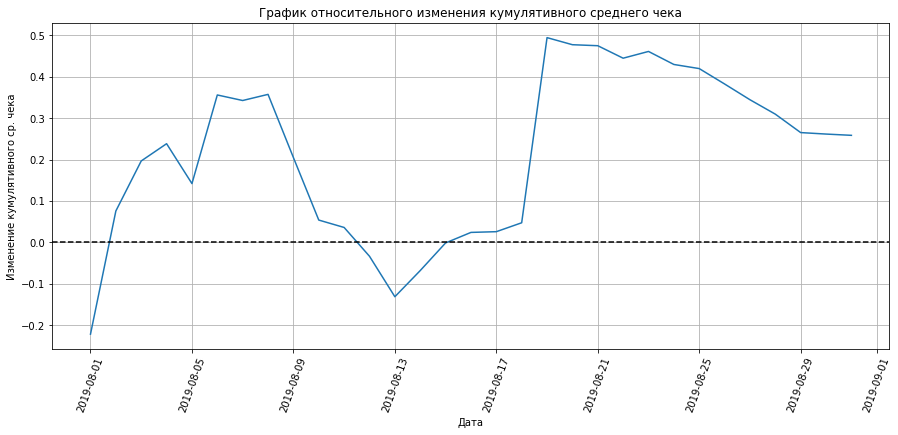

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека')
plt.ylabel('Изменение кумулятивного ср. чека')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation=70)
plt.plot()

**Вывод**

- Вывод аналогичен предыдущему графику. Ко 2 августу средний чек группы В превысил средний чек группы А. Отмечается снижение к 13 августу и резкий рост к 19 августу.

#### Построим график кумулятивного среднего количества заказов

[]

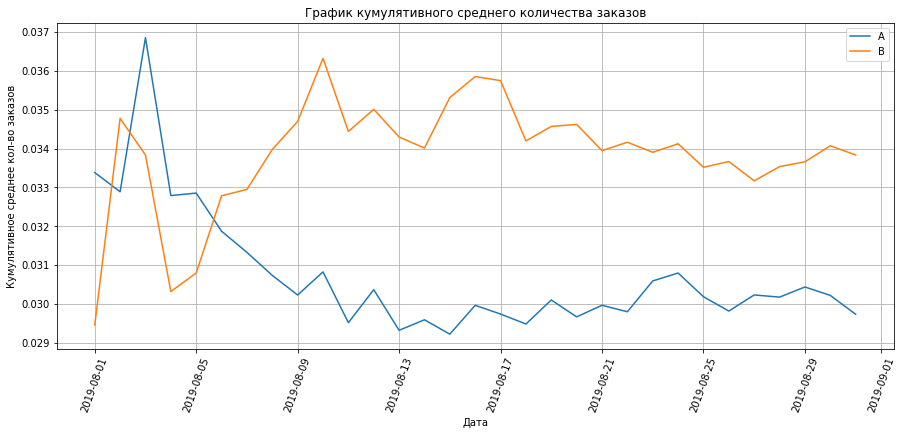

In [28]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15, 6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного среднего количества заказов')
plt.ylabel('Кумулятивное среднее кол-во заказов')
plt.xlabel('Дата')
plt.legend()
plt.grid()
plt.xticks(rotation=70)
plt.plot()

**Вывод**

- К 3 августа кумулятивное среднее количество заказов для группы А значительно превысило количество заказов для группы В. После 6 августа метрика для группы В стала значительно выше и оставалась в этом диапазоне
- Среднее количество заказов группы B в целом значительно больше A

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

[]

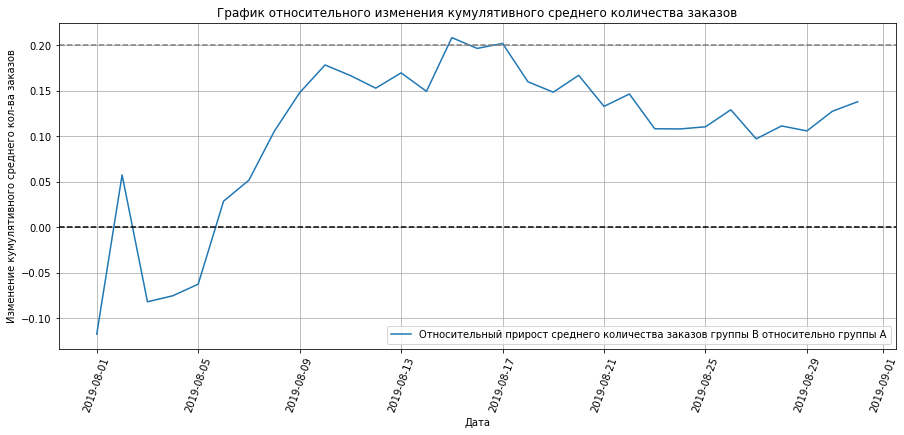

In [29]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(15, 6))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.20, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов')
plt.ylabel('Изменение кумулятивного среднего кол-ва заказов')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation=70)
plt.plot()

**Вывод**

- Группа B стабильно лидирует по конверсии с 6 августа - достигала прироста 20% относительно группы А.

#### Постройте точечный график количества заказов по пользователям

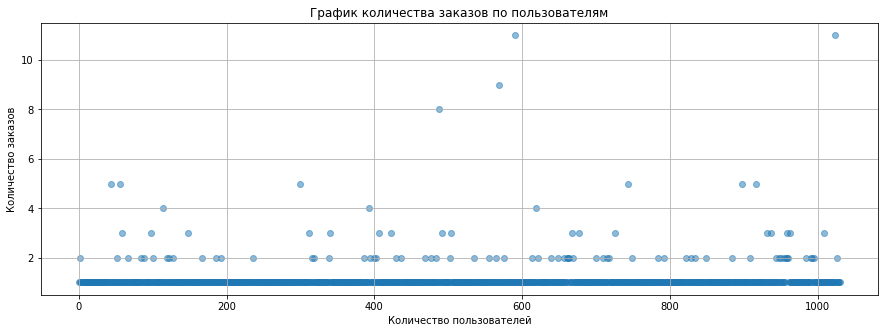

In [30]:
ordersByUsers = orders.groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

**Вывод**

- Больше всего пользователей совершили один заказ. Значительно меньше пользователей совершили 2 заказа и гораздо меньше - 3.


#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [31]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Рассмотрим процентили более детально

In [32]:
print(np.percentile(ordersByUsers['orders'], [95, 96, 97, 98, 99]))

[2. 2. 2. 3. 4.]


**Вывод**

- 95% пользователей совершают 1 заказ
- 97% пользователей совершают 1 и 2 заказа. Количество заказов выше можно считать аномалией. 

#### Построим точечный график стоимостей заказов

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


[]

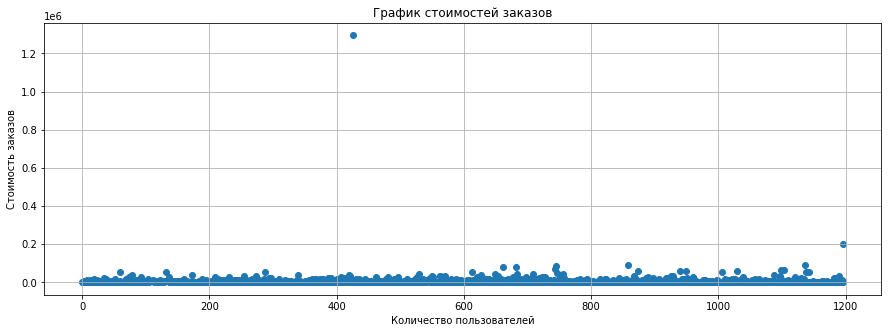

In [33]:
x_values = pd.Series(range(0, len(orders['revenue'])))

print(orders.sort_values(by='revenue', ascending=False).head(10))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.scatter(x_values, orders['revenue']) 
plt.plot()

**Вывод**

- Большинство заказов не превышают по стоимости приблизительно 60.000 у.е. Для более точного расчета нужно рассмотреть процентили;
- В выборке присутствуют "большие заказы" со стоимостью - 1294500 у.е. и 202740 у.е.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [34]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


In [35]:
print(np.percentile(orders['revenue'], [95, 96, 97, 98, 99]))

[28000.  31382.  35485.  44133.2 58233.2]


**Вывод**

- 95% заказов не превышают по стоимости 28000 у.е. 
- 99% заказов не превышают по стоимости 58233.2 у.е. Значения выше можно считать аномалией.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Создадим переменные для данных по визитам и заказам:

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Соберем данные в одну таблицу:

In [37]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Создадим датафреймы для пользователей группы А и группы В:

In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

**Проверка гипотез**

Задаем значение аlpha = 0.05. Используем критерий Манна — Уитни.

- Нулевая гипотеза - статистически значимых различий в среднем количестве заказов на посетителя между группами нет;
- Альтернативная гипотеза - статистически значимые различия есть.

In [39]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Cтатистическая значимость = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value = 0.017
Cтатистическая значимость = 0.138


**Вывод**

- Число alpha = 0.05;
- P-value = 0.017, меньше чем число alpha;
- Отвергаем нулевую гипотезу об отсутствии статистически значимых различий в среднем количестве заказов на посетителя между группами;
- Относительный прирост среднего количества заказов на пользователя для группы В к группе А равен 13.8%. 


#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

**Проверка гипотез**

Задаем значение аlpha = 0.05. Используем критерий Манна — Уитни.

- Нулевая гипотеза - статистически значимых различий в среднем чеке между группами нет;
- Альтернативная гипотеза - статистически значимые различия есть.

In [40]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Cтатистическая значимость = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05
p-value = 0.729
Cтатистическая значимость = 0.259


**Вывод**

- Число alpha = 0.05;
- P-value = 0.729, больше чем число alpha;
- Принимаем нулевую гипотезу об отсутствии статистически значимых различий в среднем чеке между группами;
- Средний чек для группы В относительно группы А выше на 25.9%.


#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Аномальными пользователями являются те, кто совершил более 2 заказов или заказ(ы) на сумму более 58233.2. Применим эти данные при подсчете статистической значимости. Определим аномальных пользователей:

In [41]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))


1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64


Удалим аномальных пользователей и очистим данные:

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)




**Проверка гипотез**

Задаем значение аlpha = 0.05. Используем критерий Манна — Уитни.

- Нулевая гипотеза - статистически значимых различий в среднем количестве заказов на посетителя нет;
- Альтернативная гипотеза - статистически значимые различия есть.

In [43]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Cтатистическая значимость = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.010
Cтатистическая значимость = 0.174


**Вывод**

- Число alpha = 0.05;
- P-value = 0.010, меньше чем число alpha;
- Отвергаем нулевую гипотезу об отсутствии статистически значимых различий в среднем количестве заказов на посетителя;
- Относительный прирост среднего количества заказов группы В к группе А по очищенным данным равен 17.4%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Проверка гипотез**

Задаем значение аlpha = 0.05. Используем критерий Манна — Уитни.

- Нулевая гипотеза - статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет;
- Альтернативная гипотеза - статистически значимые различия есть.

In [44]:
print('alpha =',0.05)

print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Cтатистическая значимость = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.798
Cтатистическая значимость = -0.020


**Вывод**

- Число alpha = 0.05;
- P-value = 0.0798, больше чем число alpha;
- Принимаем нулевую гипотезу об отсутствии различий в среднем чеке заказа между группами по «очищенным» данным;
- Средний чек для группы B ниже на 2%. 

### Выводы по результатам теста

Результаты тестирования:

- Относительный прирост среднего количества заказов группы В к группе А по "сырым" данным равен 25.9%;
- Относительный прирост среднего количества заказов группы В к группе А по "очищенным" данным равен 17.4%;
- Средний чек для группы В относительно группы А по "сырым" данным выше на 25.9%;
- Средний чек для группы B относительно группы А по "очищенным" ниже на 2%;

Учитывая вышеперечисленные результаты тестов, можно принять однозначно решение: остановить тест и зафиксировать победу группы В.